In [1]:
import numpy as np
import pandas as pd
from berliner import CMD
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("default")

# initialize it
c = CMD()

In [3]:
# get isochrones using berliner
c = CMD()
# define your grid of logAge and [M/H] as tuple(lower, upper, step)
grid_logage = (6, 10.2, 0.1)
grid_mh = (-2.6, 0.5, 0.1)
# download isochrones in parallel
isoc_lgage, isoc_mhini, isoc_list_gaiaDR2 = c.get_isochrone_grid_mh(
    grid_logage=grid_logage, grid_mh=grid_mh, photsys_file="gaiaDR2",
    n_jobs=50, verbose=10)

@CMD: n(logAge)=43, n([M/H])=32
@CMD: grid(logAge):  [ 6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7
  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1
 10.2]
@CMD: grid([M/H]) :  [-2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  2.22044605e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01]


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   4 out of  43 | elapsed:  4.3min remaining: 42.4min
[Parallel(n_jobs=50)]: Done   9 out of  43 | elapsed:  4.4min remaining: 16.5min
[Parallel(n_jobs=50)]: Done  14 out of  43 | elapsed:  6.9min remaining: 14.2min
[Parallel(n_jobs=50)]: Done  19 out of  43 | elapsed:  6.9min remaining:  8.7min
[Parallel(n_jobs=50)]: Done  24 out of  43 | elapsed:  6.9min remaining:  5.4min
[Parallel(n_jobs=50)]: Done  29 out of  43 | elapsed:  6.9min remaining:  3.3min
[Parallel(n_jobs=50)]: Done  34 out of  43 | elapsed:  6.9min remaining:  1.8min
[Parallel(n_jobs=50)]: Done  39 out of  43 | elapsed:  6.9min remaining:   42.6s
[Parallel(n_jobs=50)]: Done  43 out of  43 | elapsed:  7.0min finished


In [2]:
name = 'NGC1755'
logage = 8.104
mh = 0.006

isoc = c.get_one_isochrone(
    logage=logage,     # log age
    z=None,       # if [M/H] is not set, z is used
    mh=mh,        # [M/H]
    photsys_file='acs_wfc', # photometric system
    )

**isochrone** : representing a population of stars of the same age and metallicity but **with different mass**

- `logAge` --> logarithm of the age (in yr);

- `M_ini` --> initial mass of the star (in solar units);

- `int_IMF` --> the integral of the IMF under consideration (as selected in the form, in number of stars, and normalised to a total mass of 1 M☉) from 0 up to the current M_ini

- `Mass` --> actual mass of the star, i.e., the mass 
	obtained considering the previous history of mass-loss;

- `logL` --> logarithm of surface luminosity (in solar 
	units), log(L/Lsun);

- `logTe` --> logarithm of effective temperature (in K), 
	log(Teff/K);

- `logg` --> logarithm of surface gravity (in cgs units);

- `Mbolmag` --> absolute bolometric magnitude;

- Evolutionary stages are printed either as `stage` or as `label`. 
  The labels are: 0=PMS, 1=MS, 2=SGB, 3=RGB, (4,5,6)=different stages of CHEB, 7=EAGB, 8=TPAGB, 9=post-AGB.

- `XXXmag`  --> absolute magnitude in each pass-band;

In [8]:
isoc

Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbolmag,Gmag,G_BPmag,G_RPmag
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.014903,0.006,8.104,0.0900000036,25.54494584,0.09,-2.832,3.3999,4.776,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-2.56e-16,0.0,0.7101,0.2749,0.002691,0.000726,0.006585,-1.0,0.01497,11.85,13.799,16.689,12.443
0.014903,0.006,8.104,0.0956974626,25.6552377956,0.096,-2.784,3.4068,4.783,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-2.74e-16,0.0,0.7101,0.2749,0.002691,0.000726,0.006585,-1.0,0.01497,11.731,13.681,16.572,12.324
0.014903,0.006,8.104,0.1000000089,25.7288239022,0.1,-2.748,3.4122,4.787,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-2.9e-16,0.0,0.7101,0.2749,0.002691,0.000726,0.006585,-1.0,0.01497,11.641,13.59,16.482,12.233
0.014903,0.006,8.104,0.104724288,25.8015032491,0.105,-2.714,3.4168,4.792,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.05e-16,0.0,0.7101,0.2749,0.002691,0.000726,0.006585,-1.0,0.01497,11.556,13.493,16.367,12.138
0.014903,0.006,8.104,0.1150599793,25.936377523,0.115,-2.641,3.427,4.8,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.41e-16,0.0,0.7101,0.2749,0.002691,0.000726,0.006585,-1.0,0.01497,11.374,13.194,15.892,11.858
0.014903,0.006,8.104,0.1200000048,25.9912975808,0.12,-2.607,3.432,4.804,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.59e-16,0.0,0.7101,0.2749,0.002691,0.000726,0.006585,-1.0,0.01497,11.288,13.045,15.647,11.718
0.014903,0.006,8.104,0.1286121011,26.0753085022,0.129,-2.559,3.4377,4.809,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.86e-16,0.0,0.7101,0.2749,0.002691,0.000726,0.006585,-1.0,0.01497,11.168,12.857,15.364,11.542
0.014903,0.006,8.104,0.1400000155,26.1680009127,0.14,-2.499,3.4449,4.814,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-4.23e-16,0.0,0.7101,0.2749,0.002691,0.000726,0.006585,-1.0,0.01497,11.017,12.621,15.009,11.321
0.014903,0.006,8.104,0.1599999964,26.293995795,0.16,-2.403,3.4562,4.822,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-4.87e-16,0.0,0.7101,0.2749,0.002691,0.000726,0.006585,-1.0,0.01497,10.779,12.251,14.451,10.978


In [53]:
PMS = np.where((isoc['label']==0))[0] # pre main sequence
MS = np.where((isoc['label']==1))[0] # main sequence
SGB = np.where((isoc['label']==2))[0] # subgiant branch, or Hertzsprung gap for more intermediate+massive stars
RGB = np.where((isoc['label']==3))[0] # red giant branch, or the quick stage of red giant for intermediate+massive stars
CHEB = np.where((isoc['label']==4))[0] # core He-burning for low mass stars, or the very initial stage of CHeB for intermediate+massive stars
CHEB_b = np.where((isoc['label']==5))[0] # the blueward part of the Cepheid loop of intermediate+massive stars
CHEB_r = np.where((isoc['label']==6))[0] # the redward part of the Cepheid loop of intermediate+massive stars
EAGB = np.where((isoc['label']==7))[0] # the early asymptotic giant branch, or a quick stage of red giant for massive stars
index = np.where((isoc['label']>=0) & (isoc['label']<=7))[0]

In [71]:
massmin_id = np.where(isoc['Mini']==min(isoc['Mini'][index]))[0]
massmax_id = np.where(isoc['Mini']==max(isoc['Mini'][index]))[0]

In [69]:
ii = np.where((isoc['label']>=4) & (isoc['label']<=7))[0]
min_id = np.where(isoc['Mini'] == min(isoc['Mini'][ii]))[0]

Text(0, 0.5, 'F814W (mag)')

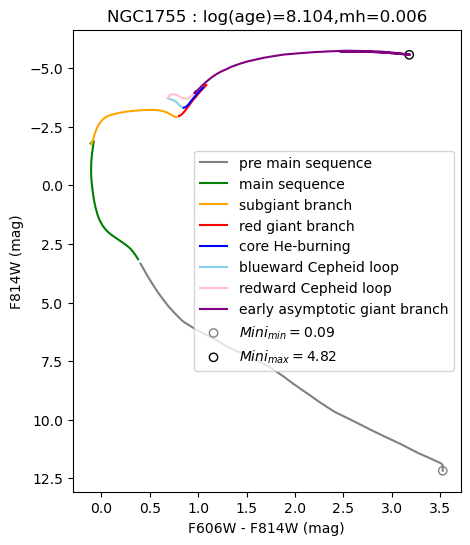

In [74]:
fig,ax =plt.subplots(figsize=(5,6))
ax.plot(isoc["F606Wmag"][PMS]-isoc["F814Wmag"][PMS], isoc["F814Wmag"][PMS], color='grey', label='pre main sequence')
ax.plot(isoc["F606Wmag"][MS]-isoc["F814Wmag"][MS], isoc["F814Wmag"][MS], color='green', label='main sequence')
ax.plot(isoc["F606Wmag"][SGB]-isoc["F814Wmag"][SGB], isoc["F814Wmag"][SGB], color='orange', label='subgiant branch')
ax.plot(isoc["F606Wmag"][RGB]-isoc["F814Wmag"][RGB], isoc["F814Wmag"][RGB], color='red', label='red giant branch')
ax.plot(isoc["F606Wmag"][CHEB]-isoc["F814Wmag"][CHEB], isoc["F814Wmag"][CHEB], color='blue', label='core He-burning')
ax.plot(isoc["F606Wmag"][CHEB_b]-isoc["F814Wmag"][CHEB_b], isoc["F814Wmag"][CHEB_b], color='skyblue', label='blueward Cepheid loop')
ax.plot(isoc["F606Wmag"][CHEB_r]-isoc["F814Wmag"][CHEB_r], isoc["F814Wmag"][CHEB_r], color='pink', label='redward Cepheid loop')
ax.plot(isoc["F606Wmag"][EAGB]-isoc["F814Wmag"][EAGB], isoc["F814Wmag"][EAGB], color='purple', label='early asymptotic giant branch')
ax.scatter(isoc["F606Wmag"][massmin_id]-isoc["F814Wmag"][massmin_id], isoc["F814Wmag"][massmin_id], color='grey', facecolors='none', label='$Mini_{min} = %.2f$'%(isoc["Mini"][massmin_id]))
ax.scatter(isoc["F606Wmag"][massmax_id]-isoc["F814Wmag"][massmax_id], isoc["F814Wmag"][massmax_id], color='black', facecolors='none', label='$Mini_{max} = %.2f$'%(isoc["Mini"][massmax_id]))
ax.invert_yaxis()
ax.legend()
ax.set_title('%s : log(age)=%s,mh=%s'%(name,str(logage),str(mh)))
ax.set_xlabel("F606W - F814W (mag)")
ax.set_ylabel("F814W (mag)")

In [6]:
isoc = isoc.to_pandas()
isoc.to_csv('../data/iso_age_%s_mh_%s.csv'%(str(logage),str(mh)),index=False)

In [7]:
isoc

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,F502Nmag,F550Mmag,F555Wmag,F606Wmag,F625Wmag,F658Nmag,F660Nmag,F775Wmag,F814Wmag,F850LPmag
0,0.014903,0.006,8.104,0.090000,25.544946,0.090,-2.832,3.3999,4.776,0,...,17.582,16.328,16.608,15.702,15.403,14.634,14.675,12.644,12.175,11.295
1,0.014903,0.006,8.104,0.095697,25.655238,0.096,-2.784,3.4068,4.783,0,...,17.467,16.211,16.492,15.584,15.286,14.515,14.557,12.526,12.056,11.176
2,0.014903,0.006,8.104,0.100000,25.728824,0.100,-2.748,3.4122,4.787,0,...,17.378,16.122,16.403,15.495,15.196,14.425,14.466,12.435,11.966,11.085
3,0.014903,0.006,8.104,0.104724,25.801503,0.105,-2.714,3.4168,4.792,0,...,17.260,16.004,16.287,15.383,15.084,14.312,14.353,12.335,11.869,10.994
4,0.014903,0.006,8.104,0.115060,25.936378,0.115,-2.641,3.4270,4.800,0,...,16.752,15.508,15.800,14.940,14.639,13.872,13.912,12.011,11.579,10.755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0.014903,0.006,8.104,4.820560,26.925396,2.378,4.401,3.4356,-0.893,8,...,14.900,10.900,12.734,9.081,7.739,6.243,6.354,3.235,2.020,-0.089
463,0.014903,0.006,8.104,4.820578,26.925396,2.271,4.405,3.4316,-0.933,8,...,17.530,13.104,15.163,11.186,9.647,7.985,8.101,4.843,3.489,1.158
464,0.014903,0.006,8.104,4.820600,26.925396,2.145,4.406,3.4278,-0.973,8,...,20.627,15.696,17.982,13.693,11.917,10.065,10.187,6.776,5.259,2.665
465,0.014903,0.006,8.104,4.820626,26.925396,2.002,4.405,3.4240,-1.018,8,...,24.523,19.026,21.549,16.946,14.867,12.784,12.913,9.337,7.619,4.691
